In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from classifier.detector_classifier import DetectorClassifier
from concept_drift.adwin import AdWin
from concept_drift.page_hinkley import PageHinkley
from evaluation.prequential import prequential


In [2]:
def read_data(filename):
    df = pd.read_csv(filename)
    data = df.values
    return data[:, :-1], data[:, -1]

In [3]:
n_train = 10000
# X, y = read_data("data/elecNormNew.csv")
X, y = read_data("data/sea.csv")

In [4]:
X = X.astype(float)
label = [0, 1]
# label = ["UP", "DOWN"]
le = preprocessing.LabelEncoder()
le.fit(label)
y = le.transform(y)

In [19]:
w = 1000

In [20]:
clfs = [
        GaussianNB(),
        DetectorClassifier(GaussianNB(), AdWin(), np.unique(y))
    ]


Static Classifier:
Mean acc within the window 1000: 0.834325946518931

Dynamic Classifier:
Drift detection: 65
Mean acc within the window 1000: 0.8707184943698879


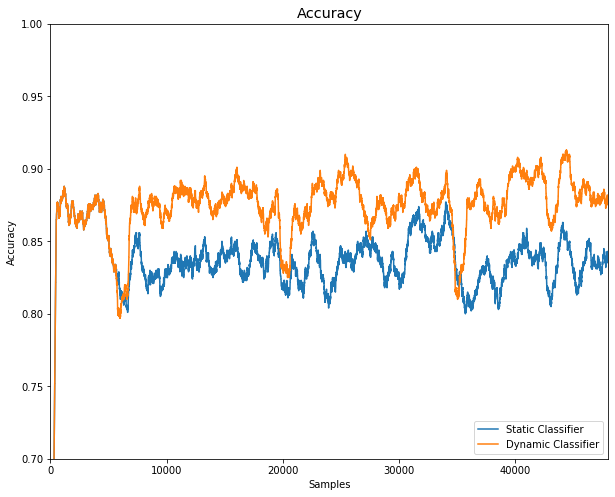

In [25]:
clfs_label = ["Static Classifier", "Dynamic Classifier"]
plt.figure(figsize = (10,8))
plt.title("Accuracy", fontsize='x-large')
plt.xlabel("Samples")
plt.ylabel("Accuracy")

for i in range(len(clfs)):
    print("\n{}:".format(clfs_label[i]))
    with np.errstate(divide='ignore', invalid='ignore'):
        y_pre, time = prequential(X, y, clfs[i], n_train)
    if clfs[i].__class__.__name__ == "DetectorClassifier":
        print("Drift detection: {}".format(clfs[i].change_detected))
    estimator = (y[n_train:] == y_pre) * 1

    acc_run = np.convolve(estimator, np.ones((w,)) / w, 'same')
    print("Mean acc within the window {}: {}".format(w, np.mean(acc_run)))
    plt.plot(acc_run, "-", label=clfs_label[i])

plt.legend(loc='lower right')
plt.ylim([0.7, 1])
plt.xlim([0, 48000])
plt.savefig('image/ADWIN_w_intervention.png')
plt.show()

In [90]:
clf = DetectorClassifier(GaussianNB(), AdWin(), np.unique(y))
# plt.title("Accuracy (exact match)")
# plt.xlabel("Instances")
# plt.ylabel("Accuracy")

print("Adwin")
with np.errstate(divide='ignore', invalid='ignore'):
    y_pre, time = prequential(X, y, clf, n_train)


Adwin


In [92]:
print("Drift detection: {}".format(clf.change_detected))
estimator = (y[n_train:] == y_pre) * 1

Drift detection: 15


Mean acc within the window 1000: 0.871720813369172


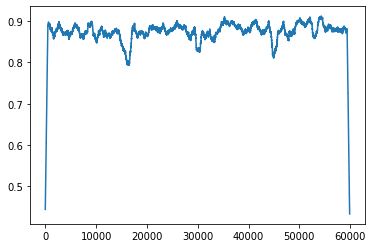

In [93]:
acc_run = np.convolve(estimator, np.ones((w,)) / w, 'same')
print("Mean acc within the window {}: {}".format(w, np.mean(acc_run)))
plt.plot(acc_run, "-", label=clfs_label[i])